<a href="https://colab.research.google.com/github/hallik95/Halldor_Portfolio/blob/main/Medical_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/data/insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'BMI')

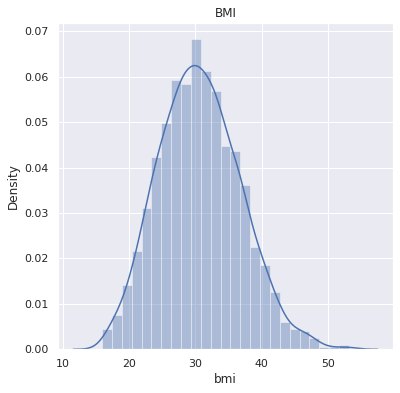

In [10]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('BMI')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Gender distribution')

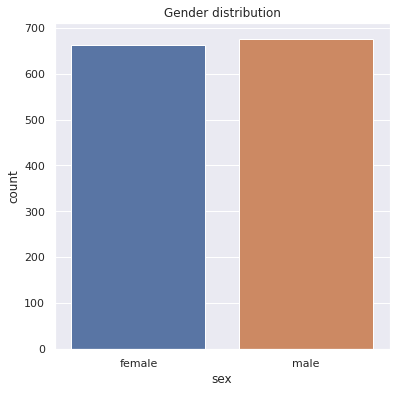

In [11]:
plt.figure(figsize=(6,6))
sns.countplot(df['sex'])
plt.title('Gender distribution')

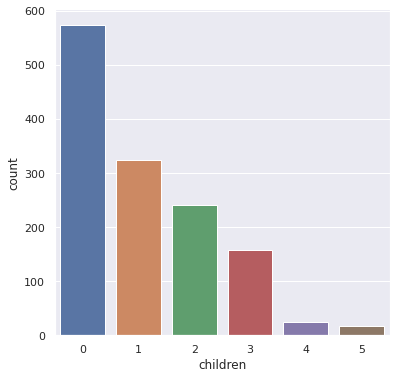

In [12]:
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df)

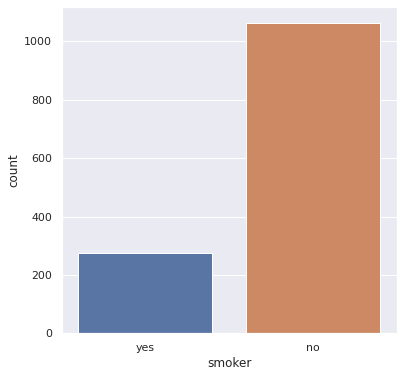

In [13]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=df)

In [14]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [15]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [16]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

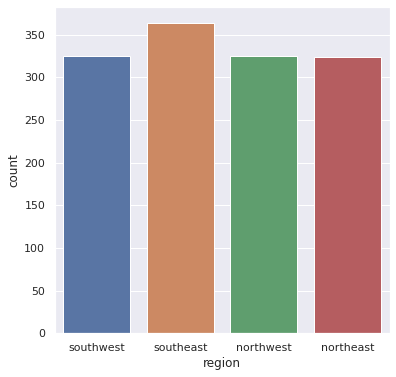

In [17]:
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Charges')

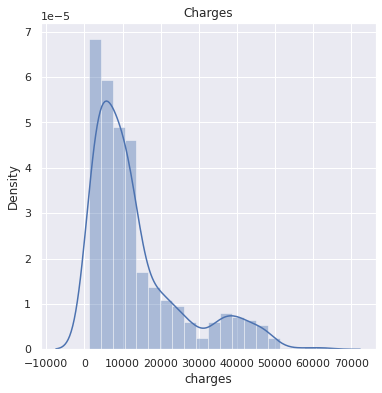

In [18]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['charges'], bins=20)
plt.title('Charges')

In [19]:
df.replace({'sex': {'male': 1, 'female': 0},
            'smoker': {'yes': 1, 'no': 0}}, inplace=True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [20]:
ohe = OneHotEncoder(sparse=False)
feature_array = ohe.fit_transform(df[['region']])

In [21]:
feature_labels = ohe.categories_

In [22]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [23]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [24]:
feature_array.shape

(1338, 4)

In [25]:
feature_labels

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [26]:
feature_labels = np.array(feature_labels).ravel()

In [27]:
print(feature_labels)

['northeast' 'northwest' 'southeast' 'southwest']


In [28]:
df[feature_labels] = pd.DataFrame(feature_array, columns = feature_labels)

In [29]:
df.head()

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,southeast,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,southeast,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,northwest,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,northwest,3866.85520,0.0,1.0,0.0,0.0


In [30]:
y = df['charges']

In [31]:
X = df.loc[:, ~df.columns.isin(['charges', 'region'])]
X.head()

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,0.0,1.0,0.0,0.0


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [33]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 9) (936, 9) (402, 9)


In [34]:
regr = LinearRegression()

In [35]:
regr.fit(X_train.values, y_train.values)

LinearRegression()

In [36]:
training_prediction = regr.predict(X_train.values)

In [37]:
r2_train = metrics.r2_score(y_train, training_prediction)
print('R-squared:', r2_train)

R-squared: 0.742398009060026


In [38]:
test_prediction = regr.predict(X_test.values)

In [39]:
r2_test = metrics.r2_score(y_test.values, test_prediction)
print('R-squared:', r2_test)

R-squared: 0.7696118054369008


In [40]:
# 31, female, 25.74, non-smoker, 0, southeast
input_data = (31, 0, 25.74, 0, 0, 0,0,1,0)
input_array = np.asarray(input_data)
inputs = input_array.reshape(1, -1)

In [41]:
inputs.shape

(1, 9)

In [42]:
X.shape

(1338, 9)

In [43]:
prediction = regr.predict(inputs)
print('The insurance costs is USD',round(prediction[0],2))

The insurance costs is USD 3736.14
